In [182]:
import pandas as pd
dfo = pd.read_csv("./Data/PiskunovPreprocessed.csv")
dfo.info()

sfp = dfo[["B-V", "logT", "Absolute Mag", "Mass[solMass]", "Vmag", "logL"]]
sfp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   logL           9564 non-null   float64
 1   Mass[solMass]  9564 non-null   float64
 2   Vmag           9564 non-null   float64
 3   logT           9564 non-null   float64
 4   Absolute Mag   9564 non-null   float64
 5   B-V            9564 non-null   float64
 6   Predicted_SpT  9564 non-null   object 
dtypes: float64(6), object(1)
memory usage: 523.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   B-V            9564 non-null   float64
 1   logT           9564 non-null   float64
 2   Absolute Mag   9564 non-null   float64
 3   Mass[solMass]  9564 non-null   float64
 4   Vmag           9564 non-null   float64
 5   logL           9564 non-n

In [183]:
sfp.isna().sum()

B-V              0
logT             0
Absolute Mag     0
Mass[solMass]    0
Vmag             0
logL             0
dtype: int64

In [184]:
import joblib
selected_features = ["logL", "Mass[solMass]","Vmag","logT", "Absolute Mag", "B-V"]
selected_NN =  ["logT", "Absolute Mag", "B-V"]
sfp2 = sfp[selected_features]
sfpN = sfp[selected_NN]
sfpG = sfp[selected_features]
sfpKN = sfp[selected_features]
sfpLR = sfp[selected_features]
sfpSV = sfp[selected_features]
sfpSE = sfp[selected_NN]
random_forest = joblib.load('./SpectralPredictionModels/Random Forest.pkl')
neural_net = joblib.load('./SpectralPredictionModels/neural_net.pkl')
gb = joblib.load('./SpectralPredictionModels/Gradient Boosting.pkl')
knear = joblib.load('./SpectralPredictionModels/Gradient Boosting.pkl')
logicalreg = joblib.load('./SpectralPredictionModels/Gradient Boosting.pkl')
svm = joblib.load('./SpectralPredictionModels/Gradient Boosting.pkl')
se = joblib.load('./SpectralPredictionModels/stacking_ensemble_model.pkl')

predictions = random_forest.predict(sfp2)
NNpredictions = neural_net.predict(sfpN)
gbP = gb.predict(sfpG)
kNN = knear.predict(sfpKN)
LR = logicalreg.predict(sfpLR)
SV = svm.predict(sfpSV)
SE = se.predict(sfpSE)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


299/299 [==============================] - 1s 4ms/step


In [185]:
sfp['Predicted_SpT'] = predictions
sfpKN['Predicted_SpT'] = kNN
sfpLR['Predicted_SpT'] = LR
sfpSV['Predicted_SpT'] = SV
sfpG['Predicted_SpT'] = gbP
sfpSE['Predicted_SpT'] = SE
predicted_labels = NNpredictions.argmax(axis=1)
sfpN['Predicted_SpT'] = predicted_labels


C:\Users\keera\AppData\Local\Temp\ipykernel_12436\3287887520.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfpSE['Predicted_SpT'] = SE
C:\Users\keera\AppData\Local\Temp\ipykernel_12436\3287887520.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfpN['Predicted_SpT'] = predicted_labels


In [186]:
# sfp.info()
# sfpN.info()
# sfpG.info()


In [187]:
spectral_type_mapping = {
    0: "O",
    1: "B",
    2: "A",
    3: "F",
    4: "G",
    5: "K",
    6: "M"
}

sfp["Predicted_SpT"] = sfp["Predicted_SpT"].map(spectral_type_mapping)
sfpN["Predicted_SpT"] = sfpN["Predicted_SpT"].map(spectral_type_mapping)
sfpG["Predicted_SpT"] = sfpG["Predicted_SpT"].map(spectral_type_mapping)
sfpSV["Predicted_SpT"] = sfpSV["Predicted_SpT"].map(spectral_type_mapping)
sfpLR["Predicted_SpT"] = sfpLR["Predicted_SpT"].map(spectral_type_mapping)
sfpKN["Predicted_SpT"] = sfpKN["Predicted_SpT"].map(spectral_type_mapping)
sfpSE["Predicted_SpT"] = sfpSE["Predicted_SpT"].map(spectral_type_mapping)

C:\Users\keera\AppData\Local\Temp\ipykernel_12436\865742648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfpN["Predicted_SpT"] = sfpN["Predicted_SpT"].map(spectral_type_mapping)
C:\Users\keera\AppData\Local\Temp\ipykernel_12436\865742648.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfpSE["Predicted_SpT"] = sfpSE["Predicted_SpT"].map(spectral_type_mapping)


In [188]:
sfpSE.tail()

,logT,Absolute Mag,B-V,Predicted_SpT
9559,3.975,1.83,0.02,B
9560,3.981,1.85,0.01,B
9561,3.936,2.03,0.09,A
9562,3.975,2.09,0.02,B
9563,3.914,2.21,0.14,A


In [189]:
sfpG.to_csv("./Data/PiskunovPreprocessed.csv", index=False)
sfpN.to_csv("./Data/NNPiskunovPreprocessed.csv", index=False)


In [190]:
# import numpy as np

# # Define conditions and corresponding spectral types
# conditions = [
#     (sfp["Predicted_SpT"] == "O") & (sfp["Mass[solMass]"] < 20) & (sfp["Mass[solMass]"] > 3),
#     (sfp["Predicted_SpT"] == "O") & (sfp["Mass[solMass]"] <= 3) & (sfp["Mass[solMass]"] > 2),
#     (sfp["Predicted_SpT"] == "O") & (sfp["Mass[solMass]"] <= 2) & (sfp["Mass[solMass]"] > 1),
#     (sfp["Predicted_SpT"] == "O") & (sfp["Mass[solMass]"] <= 1) & (sfp["Mass[solMass]"] > 0.8),
#     (sfp["Predicted_SpT"] == "O") & (sfp["Mass[solMass]"] <= 0.8) & (sfp["Mass[solMass]"] > 0.5),

# ]

# # Corresponding spectral types for each condition
# corresponding_types = ["B", "A", "F", "G", "K"]

# # Update the spectral type based on the conditions
# sfp["Predicted_SpT"] = np.select(conditions, corresponding_types, sfp["Predicted_SpT"])

# # Save the updated DataFrame to a CSV file
# sfp.to_csv("stellar_final_updated.csv", index=False)


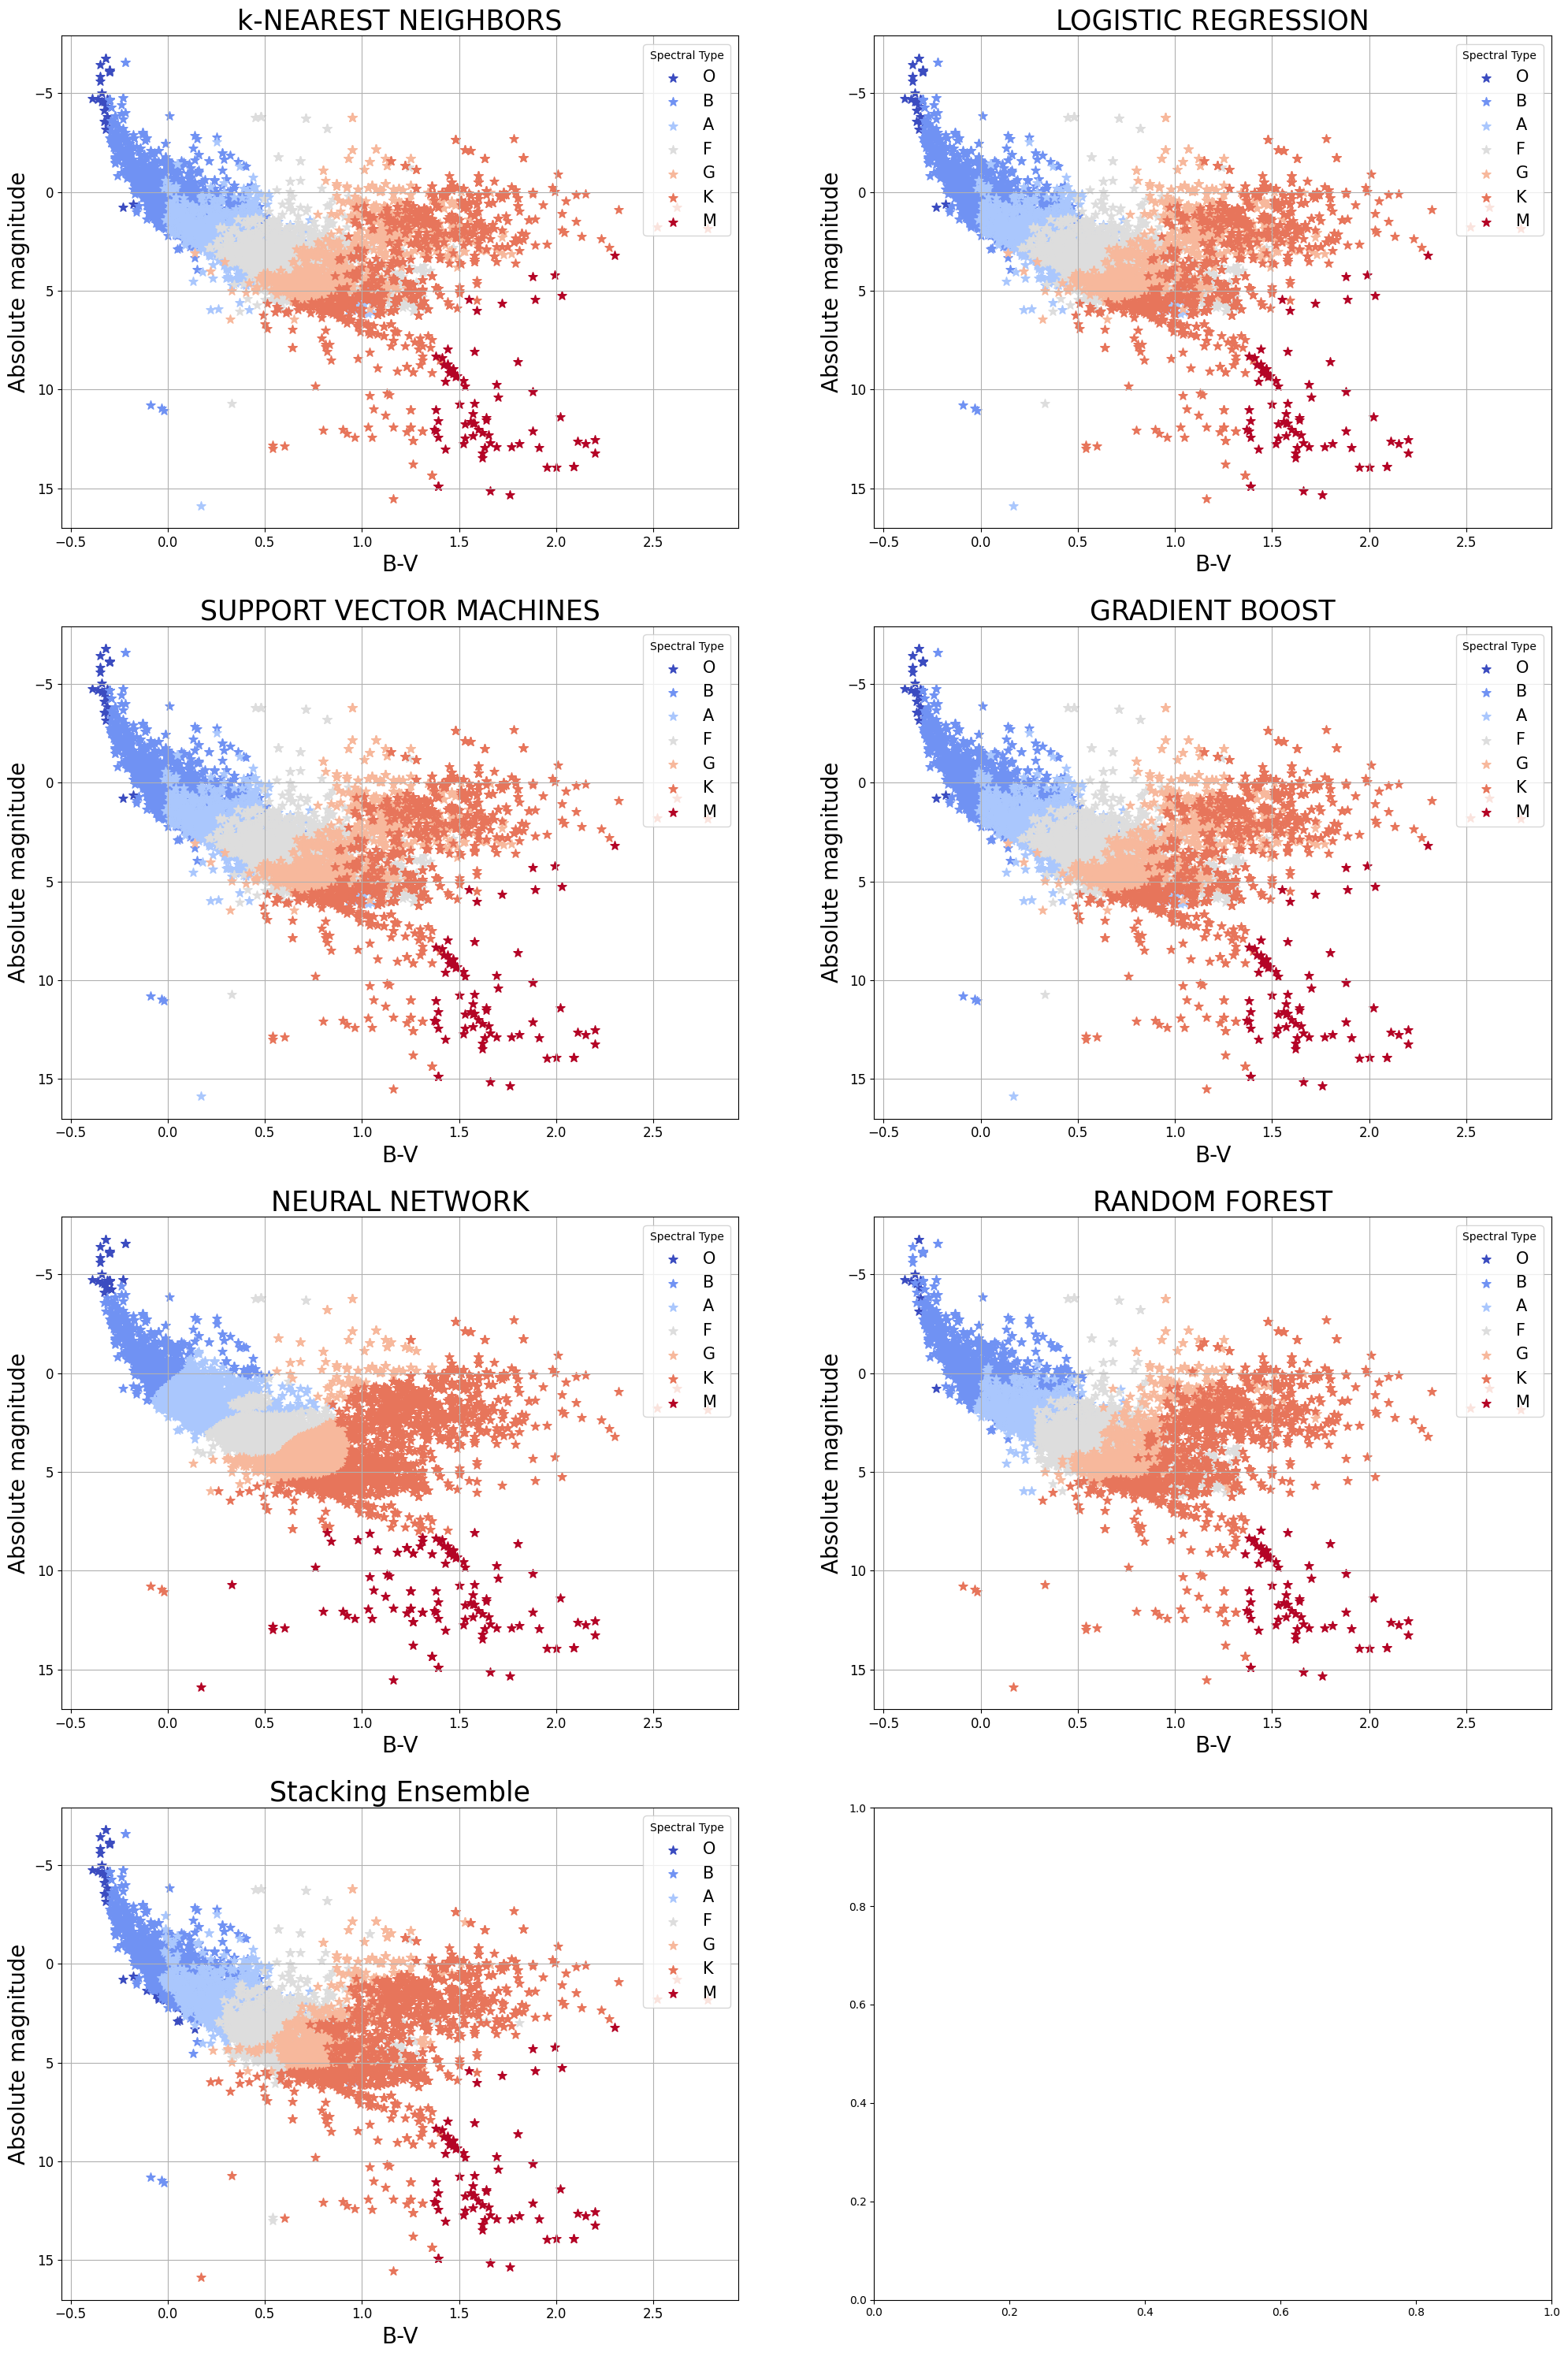

In [191]:
import matplotlib.pyplot as plt

spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

colormap = plt.get_cmap('coolwarm', len(spectral_types))

fig, axes = plt.subplots(4, 2, figsize=(20, 30))  # 2 rows, 3 columns

datasets = [sfpKN, sfpLR, sfpSV, sfpG, sfpN, sfp, sfpSE]  # Add sfpSE to your list of datasets

subplot_titles = ['k-NEAREST NEIGHBORS', 'LOGISTIC REGRESSION', 'SUPPORT VECTOR MACHINES', 'GRADIENT BOOST', 'NEURAL NETWORK', 'RANDOM FOREST', 'Stacking Ensemble']  # Add the title for the stacking ensemble

for i, dataset in enumerate(datasets):
    row = i // 2  
    col = i % 2   
    ax = axes[row, col]

    for j, sp_type in enumerate(spectral_types):
        sp_type_data = dataset[dataset['Predicted_SpT'] == sp_type]
        color = colormap(j / len(spectral_types))
        ax.scatter(sp_type_data['B-V'], sp_type_data['Absolute Mag'], s=70, color=color, marker="*", label=sp_type)

    ax.invert_yaxis()
    ax.set_xlabel('B-V', fontsize=20)
    ax.set_ylabel('Absolute magnitude', fontsize=20)
    ax.set_title(subplot_titles[i], fontsize=25)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(title='Spectral Type', loc='upper right', fontsize=15)
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()
